In [1]:

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Display settings
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (8, 5)


In [5]:

# ==== Dataset ====

DATASET_CHOICE = "breast_cancer"

In [7]:

def load_breast_cancer():
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer(as_frame=True)
    df = data.frame.copy()
    # Target is 'target' (0 = malignant, 1 = benign)
    target_col = 'target'
    return df, target_col

def load_titanic():
    # Load from seaborn; requires internet (Colab has it)
    import seaborn as sns
    df = sns.load_dataset('titanic').copy()
    # We'll predict 'survived' (0/1). Drop rows with missing target.
    df = df[~df['survived'].isna()].copy()
    df['survived'] = df['survived'].astype(int)
    target_col = 'survived'
    return df, target_col

def load_dataset(choice):
    if choice == "breast_cancer":
        return load_breast_cancer()
    else:
        raise ValueError("Unsupported dataset. Use 'breast_cancer'")

df, target_col = load_dataset(DATASET_CHOICE)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


from matplotlib import pyplot as plt
_df_0['mean radius'].plot(kind='hist', bins=20, title='mean radius')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean texture'].plot(kind='hist', bins=20, title='mean texture')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['mean perimeter'].plot(kind='hist', bins=20, title='mean perimeter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['mean area'].plot(kind='hist', bins=20, title='mean area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean radius', y='mean texture', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean texture', y='mean perimeter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='mean perimeter', y='mean area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='mean area', y='mean smoothness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['mean radius']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('mean radius')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['mean texture']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('mean texture')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['mean perimeter']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('mean perimeter')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['mean area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('mean area')

from matplotlib import pyplot as plt
_df_12['mean radius'].plot(kind='line', figsize=(8, 4), title='mean radius')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean texture'].plot(kind='line', figsize=(8, 4), title='mean texture')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['mean perimeter'].plot(kind='line', figsize=(8, 4), title='mean perimeter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['mean area'].plot(kind='line', figsize=(8, 4), title='mean area')
plt.gca().spines[['top', 'right']].set_visible(False)

## Basic EDA

In [8]:

print("Shape:", df.shape)
display(df.describe(include='all'))
print("\nMissing values per column:")
print(df.isna().sum())


Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000



Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


Shape of dataset: (569, 31)

Column datatypes:
 float64    30
int64       1
Name: count, dtype: int64


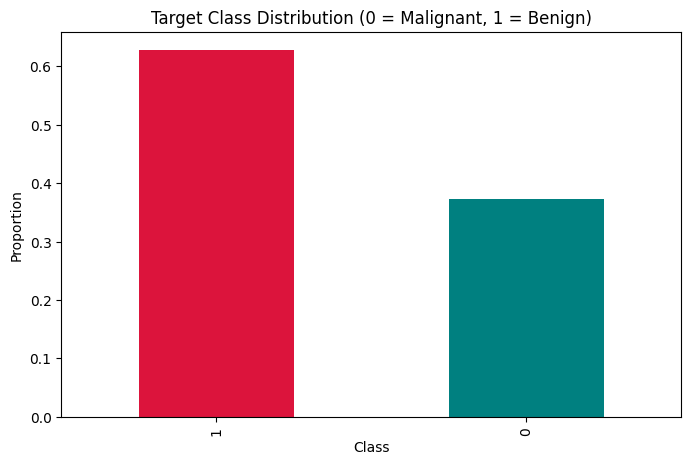

In [15]:
# Shape and column info
print("Shape of dataset:", df.shape)
print("\nColumn datatypes:\n", df.dtypes.value_counts())

# Quick look at target distribution
df['target'].value_counts(normalize=True).plot(
    kind='bar',
    title='Target Class Distribution (0 = Malignant, 1 = Benign)',
    xlabel='Class',
    ylabel='Proportion',
    color=['crimson', 'teal']
)
plt.show()


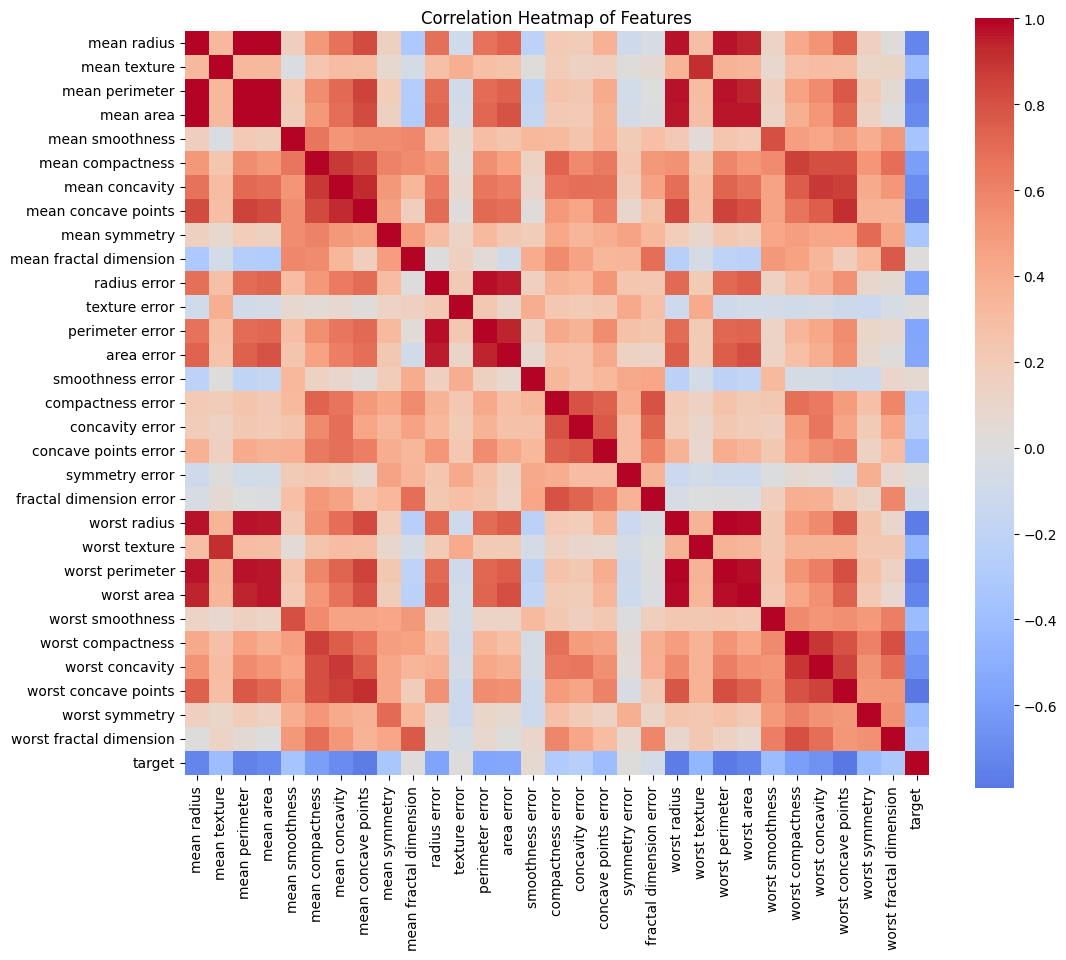

Top features positively correlated with benign tumors:
 smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
Name: target, dtype: float64

Top features negatively correlated with benign tumors:
 mean perimeter         -0.742636
worst radius           -0.776454
mean concave points    -0.776614
worst perimeter        -0.782914
worst concave points   -0.793566
Name: target, dtype: float64


In [16]:
# Correlation heatmap of numerical features
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, cbar=True, square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

# Identify top correlated features with target
target_corr = corr['target'].drop('target').sort_values(ascending=False)
print("Top features positively correlated with benign tumors:\n", target_corr.head())
print("\nTop features negatively correlated with benign tumors:\n", target_corr.tail())


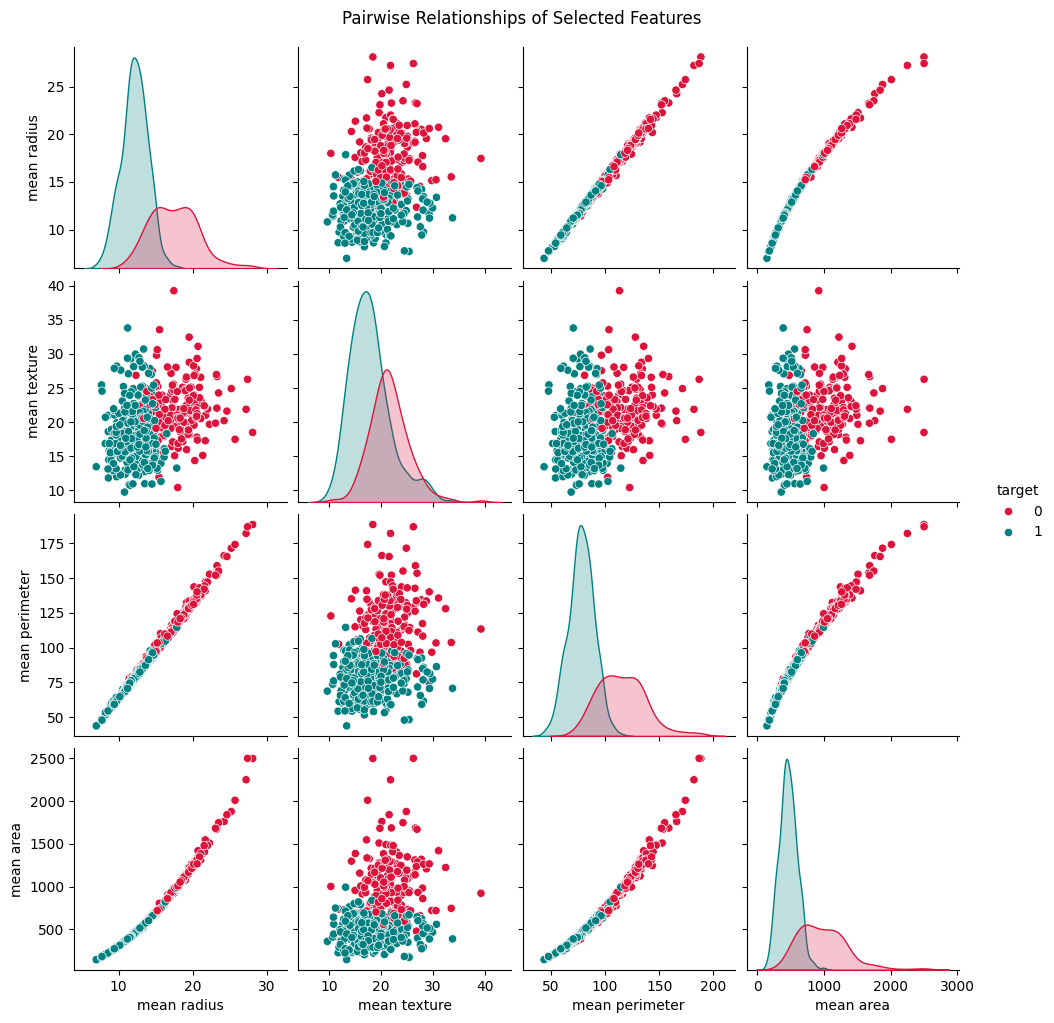

In [18]:
# Pairplot of selected features
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']],
             hue='target', palette={0: "crimson", 1: "teal"})
plt.suptitle("Pairwise Relationships of Selected Features", y=1.02)
plt.show()


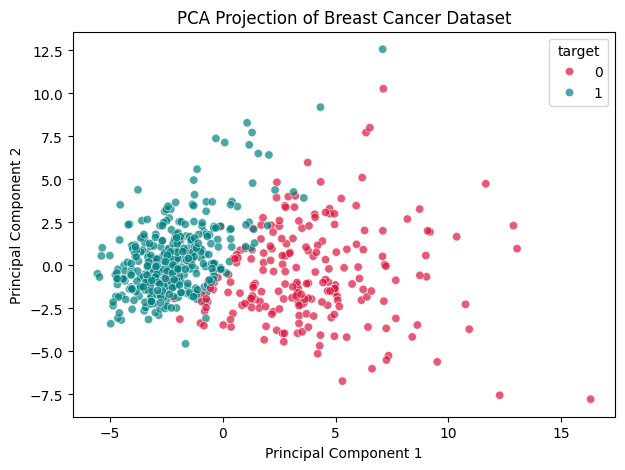

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df.drop('target', axis=1))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['target'],
                palette={0: "crimson", 1: "teal"}, alpha=0.7)
plt.title("PCA Projection of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## Correlation Heatmap (numeric features)

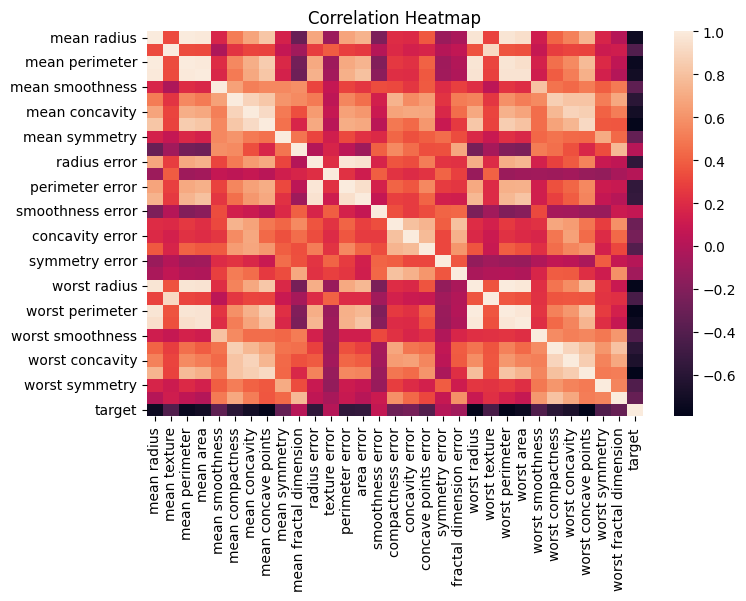

In [9]:

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 2:
    sns.heatmap(numeric_df.corr(), annot=False)
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric features to plot a correlation heatmap.")


## Train/Test Split

In [10]:

X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if len(np.unique(y)) > 1 else None
)
X_train.shape, X_test.shape


((455, 30), (114, 30))

## Preprocessing (Imputation, Encoding, Scaling)

In [11]:

numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Categorical features: []


In [12]:

def train_and_evaluate(model, model_name):
    pipe = Pipeline(steps=[('prep', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred, zero_division=0),
        "f1": f1_score(y_test, y_pred, zero_division=0),
    }
    print(f"\n=== {model_name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # ROC-AUC (binary only)
    try:
        if hasattr(pipe.named_steps['model'], "predict_proba"):
            y_score = pipe.predict_proba(X_test)[:, 1]
        else:
            # Some models (like SVM with linear kernel) use decision_function
            if hasattr(pipe.named_steps['model'], "decision_function"):
                y_score = pipe.decision_function(X_test)
            else:
                y_score = None

        if y_score is not None and len(np.unique(y)) == 2:
            auc = roc_auc_score(y_test, y_score)
            metrics["roc_auc"] = auc
            RocCurveDisplay.from_predictions(y_test, y_score)
            plt.title(f"ROC Curve - {model_name}")
            plt.show()
    except Exception as e:
        print("ROC could not be plotted:", e)

    return pipe, metrics


## Train Baseline Models


=== Logistic Regression ===
Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



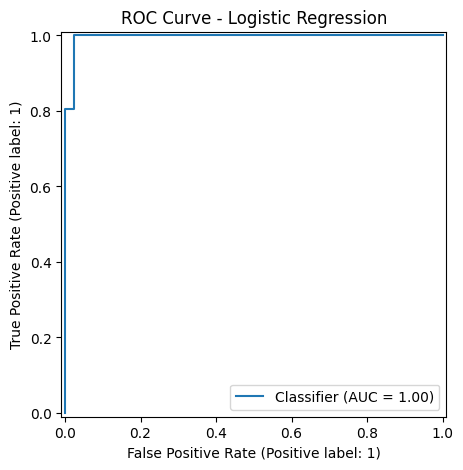


=== KNN (k=5) ===
Confusion Matrix:
 [[39  3]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



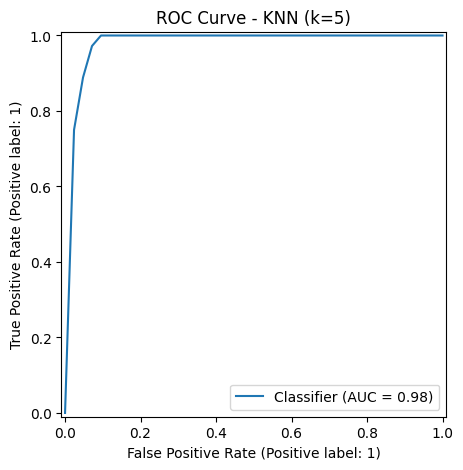


=== SVM (RBF) ===
Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



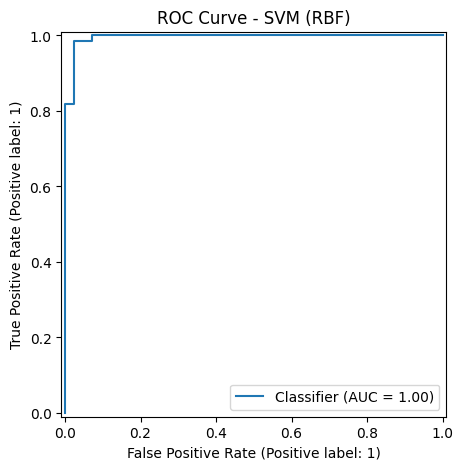

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.982456,0.986111,0.986111,0.986111,0.995370
KNN,0.956140,0.958904,0.972222,0.965517,0.978836
SVM,0.982456,0.986111,0.986111,0.986111,0.995040


In [13]:

results = {}

logreg_model, results['LogisticRegression'] = train_and_evaluate(
    LogisticRegression(max_iter=200, n_jobs=None, solver='lbfgs'), "Logistic Regression"
)

knn_model, results['KNN'] = train_and_evaluate(
    KNeighborsClassifier(n_neighbors=5), "KNN (k=5)"
)

svm_model, results['SVM'] = train_and_evaluate(
    SVC(kernel='rbf', probability=True, random_state=42), "SVM (RBF)"
)

pd.DataFrame(results).T


## Hyperparameter Search

Best params: {'model': SVC(probability=True, random_state=42), 'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Best CV F1: 0.9827547753047131

=== Best Model on Test ===
Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1: 0.9861111111111112

Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



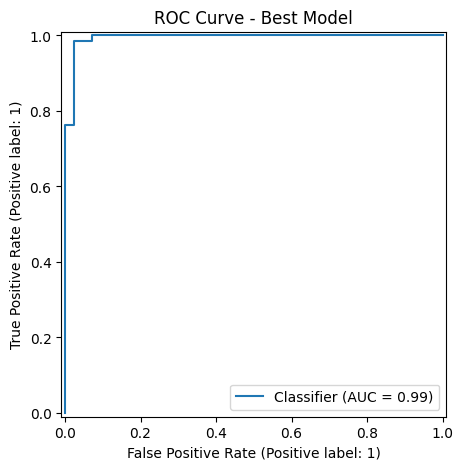

In [14]:

# We'll tune K for KNN and C/gamma for SVM quickly.
param_grid = [
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3,5,7,9]
    },
    {
        'model': [SVC(probability=True, random_state=42)],
        'model__kernel': ['rbf', 'linear'],
        'model__C': [0.1, 1, 10],
        'model__gamma': ['scale', 'auto']
    }
]

pipe = Pipeline(steps=[('prep', preprocessor), ('model', KNeighborsClassifier())])
grid = GridSearchCV(pipe, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=0)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\n=== Best Model on Test ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1:", f1_score(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# ROC curve for best model (if binary & probability/decision available)
try:
    if hasattr(best_model.named_steps['model'], "predict_proba"):
        y_score = best_model.predict_proba(X_test)[:, 1]
    elif hasattr(best_model.named_steps['model'], "decision_function"):
        y_score = best_model.decision_function(X_test)
    else:
        y_score = None

    if y_score is not None and len(np.unique(y)) == 2:
        RocCurveDisplay.from_predictions(y_test, y_score)
        plt.title("ROC Curve - Best Model")
        plt.show()
except Exception as e:
    print("ROC could not be plotted:", e)



## Conclusion

- We reproduced the workflow on a different dataset and compared **Logistic Regression**, **KNN**, and **SVM**.  
- For **Breast Cancer**, models typically achieve high accuracy (features are clean & numeric).  
- For **Titanic**, performance varies more due to missing values & categorical variables; preprocessing strongly influences results.  
- Include the results table, confusion matrices, ROC curves, and your short interpretation in your submission.
